In [1]:
import numpy as np
import random, math, copy
import matplotlib.pyplot as plt
from solver import straddle_solver, lse_solver, p_prob_var_solver, p_straddle_solver
from tester import tester
from utils import sinusoid, zero_mean, squared_exponential_kernel
%matplotlib inline

In [2]:
x, y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
x, y = np.reshape(x, (-1, 1)), np.reshape(y, (-1, 1))
sample_space = list(np.hstack((x, y)))
k = squared_exponential_kernel(math.exp(1), math.exp(-1.5))

In [3]:
drop_rate = [0.1 * i for i in range(8)]

In [4]:
tester_drop = tester(sample_num=50, iter_num=5, hist=False)

In [5]:
solver = []
for i in range(len(drop_rate)):
    solver.append(p_straddle_solver(sample_space=sample_space,
    threshold=1,
    sigma=math.exp(-1),
    function=sinusoid,
    kernel=k,
    mean=zero_mean,
    dropout=drop_rate[i]))

In [6]:
res = []
res_time = []
for i in range(len(drop_rate)):
    tester_drop.clear()
    tester_drop.run(solver[i])
    res.append(tester_drop.F1_list)
    res_time.append(tester_drop.run_time)

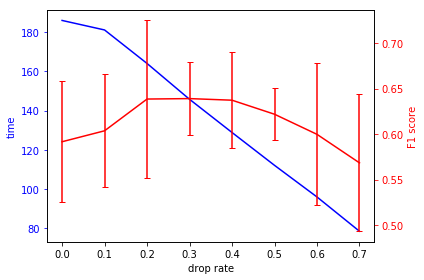

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(drop_rate, res_time, color='b')
ax1.set_xlabel('drop rate')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('time', color='b')
ax1.tick_params('y', colors='b')

res_array = np.array(res)
mean = np.mean(res_array, axis=1)
err = np.std(res_array, axis=1)
ax2 = ax1.twinx()
ax2.errorbar(drop_rate, mean, err, color='r', capsize=3)
ax2.set_ylabel('F1 score', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.savefig('drop_time_score.png', dpi=600)

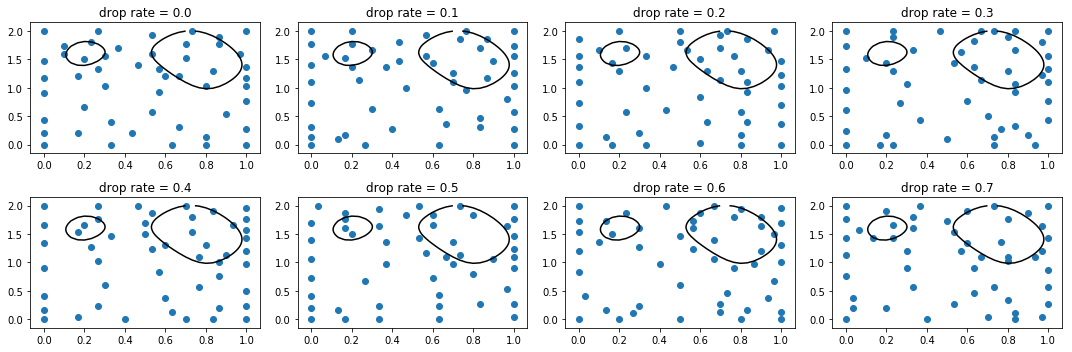

In [10]:
labels = ['drop rate = %.1f' % x for x in drop_rate]
plt.figure(figsize=(15, 5))
for i in range(len(drop_rate)):
    plt.subplot(2, 4, i + 1)    
    # plot contour
    X,Y = np.meshgrid(np.linspace(0, 1, 31), np.linspace(0, 2, 61))
    Z = np.vectorize(math.sin)(10*X) + np.vectorize(math.cos)(4*Y) - np.vectorize(math.cos)(3*X*Y)
    contour = plt.contour(X,Y,Z,[1],colors='k')
    x = [p[0] for p in solver[i].x_hist]
    y = [p[1] for p in solver[i].x_hist]
    plt.scatter(x, y)
    plt.title(labels[i])
plt.tight_layout()
plt.savefig('drop_location.png', dpi=600)